classificador de imagens

In [17]:
#importar
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#mnist
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
classes = np.unique(train_labels)
classes_num = len(classes)

In [21]:
plt.figure(figsize=[10,5])

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'numero : 7')

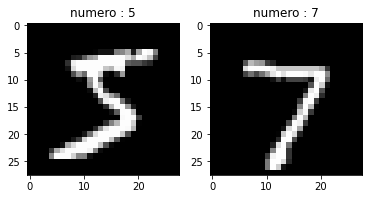

In [53]:
# Mostarr a primeira imagem 
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("numero : {}".format(train_labels[0]))
# a segunda
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("numero : {}".format(test_labels[0]))
#numero 5 e 7

In [26]:
#Processamento
#converte cada matriz de imagem ( 28×28 ) em um array ( 28*28 = 784 ) 
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [27]:
# Muda para float
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [28]:
# converte o tipo inteiro para categorical(representação booleana)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [31]:
#Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#rede
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#treinar agora, com 20 epocas , usando test_data
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 21.1504 - accuracy: 0.7977 - val_loss: 0.9038 - val_accuracy: 0.9185
Epoch 2/20
235/235 [==============================] - 6s 26ms/step - loss: 0.4588 - accuracy: 0.9473 - val_loss: 0.3804 - val_accuracy: 0.9418
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.2522 - accuracy: 0.9604 - val_loss: 0.5612 - val_accuracy: 0.9242
Epoch 4/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1880 - accuracy: 0.9683 - val_loss: 0.3402 - val_accuracy: 0.9530
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1667 - accuracy: 0.9720 - val_loss: 0.2920 - val_accuracy: 0.9674
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1524 - accuracy: 0.9776 - val_loss: 0.4121 - val_accuracy: 0.9567
Epoch 7/20
235/235 [==============================] - 6s 26ms/step - loss: 0.1372 - accuracy: 0.9788 - val_loss: 0.2704 - val_accuracy: 0.967

In [52]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("resultado no Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.5657 - accuracy: 0.9759
resultado no Test Data : Loss = 0.5657034516334534, accuracy = 0.9758999943733215


Text(0.5, 1.0, 'Loss Curves')

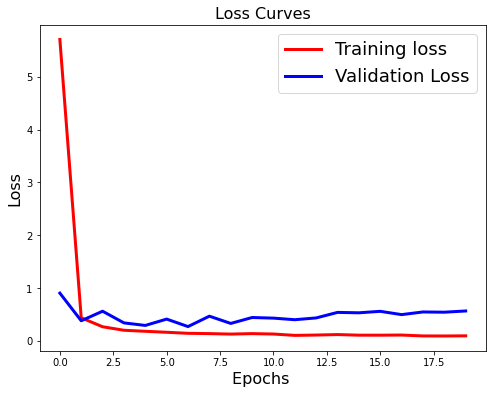

In [35]:
#imprimir a  Loss Curve
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


Text(0.5, 1.0, 'Accuracy Curves')

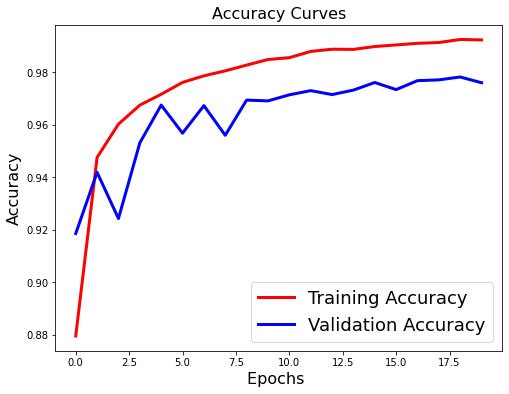

In [37]:
#imprimir a Curva de Acuracia
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [38]:
#regularizaçoao
from tensorflow.keras.layers import Dropout

model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(classes_num, activation='softmax'))

Epoch 1/20
235/235 [==============================] - 8s 30ms/step - loss: 25.8243 - accuracy: 0.6516 - val_loss: 0.5438 - val_accuracy: 0.9060
Epoch 2/20
235/235 [==============================] - 7s 30ms/step - loss: 1.0831 - accuracy: 0.8209 - val_loss: 0.3734 - val_accuracy: 0.9305
Epoch 3/20
235/235 [==============================] - 7s 30ms/step - loss: 0.7275 - accuracy: 0.8745 - val_loss: 0.2885 - val_accuracy: 0.9426
Epoch 4/20
235/235 [==============================] - 7s 30ms/step - loss: 0.5363 - accuracy: 0.8990 - val_loss: 0.2123 - val_accuracy: 0.9516
Epoch 5/20
235/235 [==============================] - 7s 29ms/step - loss: 0.4203 - accuracy: 0.9154 - val_loss: 0.1642 - val_accuracy: 0.9571
Epoch 6/20
235/235 [==============================] - 7s 29ms/step - loss: 0.3564 - accuracy: 0.9247 - val_loss: 0.1580 - val_accuracy: 0.9598
Epoch 7/20
235/235 [==============================] - 7s 29ms/step - loss: 0.3102 - accuracy: 0.9320 - val_loss: 0.1611 - val_accuracy: 0.963

Text(0.5, 1.0, 'Accuracy Curves')

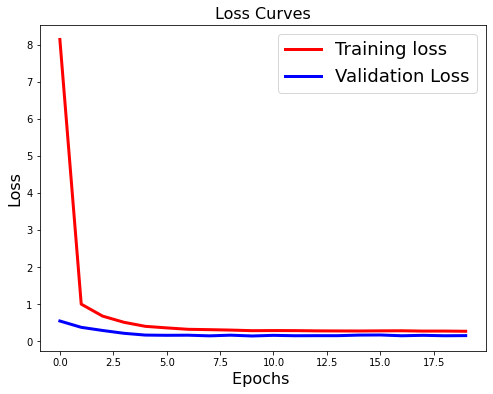

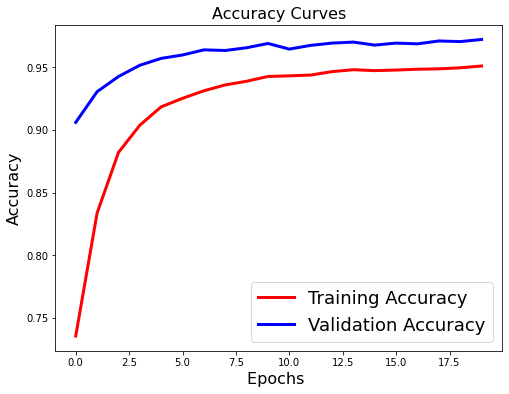

In [39]:
#agora checar a performance depois de trer regularizado
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#treinar dnv
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

#Plota a curva de perda
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plotar a curva ed Accuracy pra analisar
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict: 1


Text(0.5, 1.0, 'numero : 1')

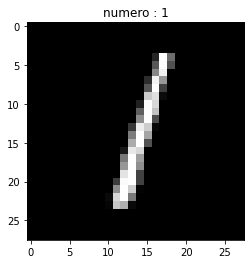

In [51]:
#pelos graficos anteriores da pra ver q a 'validation loss' não esta aumentando e a diferença entre o treino
#e validation é pequena

# fazer o predict
print("predict: {}".format(model_reg.predict_classes(test_data[[2],:])[0]))

# plota a imagem do predict..
plt.imshow(test_images[2], cmap='gray')
plt.title("numero : {}".format(test_labels[2]))

In [49]:
# predic as probabilidades para cada uma das classes... 
model_reg.predict(test_data[[2],:])

array([[0.0000000e+00, 1.0000000e+00, 1.9759278e-30, 0.0000000e+00,
        1.2327307e-24, 7.7486225e-32, 0.0000000e+00, 1.5278261e-33,
        5.3796046e-27, 1.3575544e-34]], dtype=float32)

In [ ]:
#da pra ver que o que mais se aproxima do valor '1' é o segundo valor do array.